# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [132]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [133]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [134]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.2
pandas version: 2.2.3
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [135]:
# Try loading one file

df = pd.read_parquet(r'H:\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet')
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [136]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'H:\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        # Reading the current file
        dfTaxi = pd.read_parquet(file_path)
        dfTaxi['tpep_pickup_date']=pd.to_datetime(dfTaxi['tpep_pickup_datetime'].dt.date)
        dfTaxi['tpep_pickup_hour']=dfTaxi['tpep_pickup_datetime'].dt.hour
        dfTaxi['tpep_pickup_month']=dfTaxi['tpep_pickup_datetime'].dt.month
        dfTaxi['tpep_pickup_year'] = dfTaxi['tpep_pickup_datetime'].dt.year
        
        #Filter datast to only iclude data of 2023 for analysis
        dfTaxi =dfTaxi[dfTaxi['tpep_pickup_year'] == 2023]
        #Get Unique Dates and Hour
        uniqueDate = sorted(dfTaxi['tpep_pickup_date'].unique())
        uniqueHour = sorted(dfTaxi['tpep_pickup_hour'].unique())
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in uniqueDate:
            # Iterate through each hour of the selected date
            for hour in uniqueHour:
                hour_data= dfTaxi[(dfTaxi['tpep_pickup_date']== date) & (dfTaxi['tpep_pickup_hour']== hour)]
                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac = 0.05, random_state = 42)
                sampled_data = pd.concat([sampled_data,sample])
               
                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df=pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [137]:
# Store the df in csv/parquet
#15% of sample will give the data in the range of 2.5 to 3 L
df=df.sample(frac=0.15,random_state = 42)
df.to_parquet(r'H:\Datasets and Dictionary-NYC\Datasets and Dictionary\NYC_Taxi_2023.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [138]:
# Load the new data file

df = pd.read_parquet(r'H:\Datasets and Dictionary-NYC\Datasets and Dictionary\NYC_Taxi_2023.parquet')

In [139]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
871450          1  2023-07-11 21:46:13   2023-07-11 21:51:39              1.0   
827841          1  2023-01-10 14:25:03   2023-01-10 14:29:14              1.0   
374435          2  2023-02-04 15:03:50   2023-02-04 15:47:48              1.0   
2896374         1  2023-03-28 10:49:36   2023-03-28 10:57:44              0.0   
375011          2  2023-09-05 17:03:28   2023-09-05 17:12:44              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
871450            0.90         1.0                  N           151   
827841            0.70         1.0                  N           262   
374435           21.09         2.0                  N           132   
2896374           1.00         1.0                  N           239   
375011            1.74         1.0                  N           142   

         DOLocationID  payment_type  ...  tolls_amount  improvement_surcharge  \
871450             41             1  ...          0.00                    1.0   
827841            236             1  ...          0.00                    1.0   
374435            151             1  ...          6.55                    1.0   
2896374           142             1  ...          0.00                    1.0   
375011            237             1  ...          0.00                    1.0   

         total_amount  congestion_surcharge  airport_fee  tpep_pickup_date  \
871450          10.80                   0.0          NaN        2023-07-11   
827841          12.50                   2.5          0.0        2023-01-10   
374435          89.30                   0.0          NaN        2023-02-04   
2896374         16.30                   2.5          NaN        2023-03-28   
375011          21.48                   2.5          NaN        2023-09-05   

         tpep_pickup_hour  tpep_pickup_month  tpep_pickup_year Airport_fee  
871450                 21                  7              2023        0.00  
827841                 14                  1              2023         NaN  
374435                 15                  2              2023        1.25  
2896374                10                  3              2023        0.00  
375011                 17                  9              2023        0.00  

[5 rows x 24 columns]

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284460 entries, 871450 to 681517
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284460 non-null  int64         
 1   tpep_pickup_datetime   284460 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284460 non-null  datetime64[us]
 3   passenger_count        274660 non-null  float64       
 4   trip_distance          284460 non-null  float64       
 5   RatecodeID             274660 non-null  float64       
 6   store_and_fwd_flag     274660 non-null  object        
 7   PULocationID           284460 non-null  int64         
 8   DOLocationID           284460 non-null  int64         
 9   payment_type           284460 non-null  int64         
 10  fare_amount            284460 non-null  float64       
 11  extra                  284460 non-null  float64       
 12  mta_tax                284460 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [141]:
# Fix the index and drop any columns that are not needed
df.reset_index(inplace=True,drop=True)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [142]:
# Combine the two airport fee columns
df['airport_fee'] = df[['airport_fee', 'Airport_fee']].sum( axis=1)
#After merging drop 1 out of two ariport_fee column 
df.drop('Airport_fee',axis=1,inplace=True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [143]:
# check where values of fare amount are negative
df[df['fare_amount'] < 0]


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, tpep_pickup_date, tpep_pickup_hour, tpep_pickup_month, tpep_pickup_year]
Index: []

[0 rows x 23 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [144]:
# Analyse RatecodeID for the negative fare amounts

df[df['fare_amount'] < 0]
print('No data found with negative fare amounts')

No data found with negative fare amounts


In [145]:
# Find which columns have negative values
monetaryCol = ['fare_amount','extra','mta_tax','tip_amount','improvement_surcharge','total_amount',
  'congestion_surcharge','airport_fee']
df[monetaryCol].lt(0).sum()
    


fare_amount               0
extra                     0
mta_tax                   9
tip_amount                0
improvement_surcharge    11
total_amount             11
congestion_surcharge      6
airport_fee               2
dtype: int64

In [146]:
# fix these negative values
#Since the count of row with negative value are less ,it is better to delete those instead of imputing them
df=df[df['mta_tax']>=0]
df=df[df['improvement_surcharge'] >= 0]

#Now we could see there are no row data with negative value
df[monetaryCol].lt(0).sum()

fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [147]:
# Find the proportion of missing values in each column

df.isnull().sum()/df.shape[0]

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034453
trip_distance            0.000000
RatecodeID               0.034453
store_and_fwd_flag       0.034453
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034453
airport_fee              0.000000
tpep_pickup_date         0.000000
tpep_pickup_hour         0.000000
tpep_pickup_month        0.000000
tpep_pickup_year         0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [148]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df['passenger_count'].isna()]
# Passenger count cannot be null or a fraction value ,Mean is 1.36, Median is 1.0 and Max is 9.0
# so we will impute NAN value with median in this case.

df['passenger_count'].fillna(df['passenger_count'].median(),inplace=True)
#Verifing if we have any missing data post imputations
df['passenger_count'].isna().sum()

np.int64(0)

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [149]:
# Fix missing values in 'RatecodeID'
#Ratecoded is Technically as Categetory column so we should go with most used value using mode imputations 
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0],inplace=True)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [150]:
# handle null values in congestion_surcharge
#Congestion subcharge can have two value either your pay 2.5 or you don't pay 0, so we cannot do  mean imputation here
#Both median and Mode are giving same result of 2.5 , so we will impute NAN value with mode
df['congestion_surcharge'].fillna(df['congestion_surcharge'].mode()[0],inplace=True)



Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [151]:
# Handle any remaining missing values
print(df.isna().sum())
#Below column has missing / nan value
#store_and_fwd_flag
#airport_fee

# store_and_fwd_flag is a category column we will go with mode imputations
df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0],inplace=True)

# airport_fee  can have two value either your pay 1.5 or you don't pay 0, so we cannot go with any mean here
#Both mdeian and Mode are giving same result of 0 , so we will impute NAN value with mode

df['airport_fee'].fillna(df['airport_fee'].mode()[0],inplace=True)


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag       9800
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
airport_fee                 0
tpep_pickup_date            0
tpep_pickup_hour            0
tpep_pickup_month           0
tpep_pickup_year            0
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

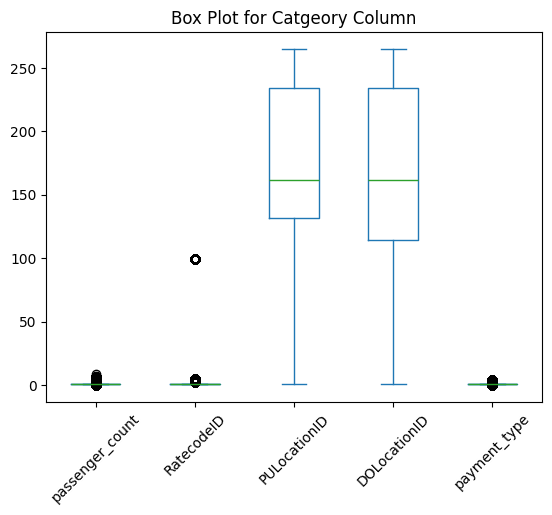

In [152]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
monetaryColumns =['fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount',
                    'congestion_surcharge','airport_fee']
categoryColumn =['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','RatecodeID',
                'PULocationID','DOLocationID','payment_type']
numberColumns =['trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount',
                    'congestion_surcharge','airport_fee']

df[categoryColumn].plot.box()
plt.title('Box Plot for Catgeory Column')
plt.xticks(rotation=45)
plt.show()

#Analysis
#Using blox plot it is easy to visualize the outliner

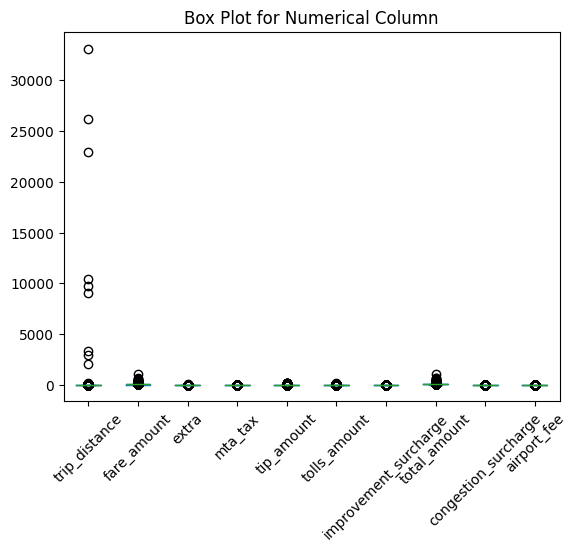

In [153]:
df[numberColumns].plot.box()
plt.title('Box Plot for Numerical Column')
plt.xticks(rotation=45)
plt.show()


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [156]:
# remove passenger_count > 6
print( 'No of rows with passenger count greater than 6 -> ' ,df[df['passenger_count'] > 6].shape[0])

#There are two row meeting above condition , so it is better to remove than rather than impute
df =df[df['passenger_count'] <= 6]

No of rows with passenger count greater than 6 ->  0


In [157]:
# Continue with outlier handling
print( 'No of rows where  trip_distance is 0 and  fare_amount greater than 300 -> ' ,
      df[(df['trip_distance'] == 0) & (df['fare_amount'] >300)].shape[0])
#Since no of outliner are less we will delete them instead of imputation
df =df[~((df['trip_distance'] == 0) & (df['fare_amount'] >300))]

No of rows where  trip_distance is 0 and  fare_amount greater than 300 ->  4


In [158]:
print( 'No of rows where  trip_distance is 0 and  fare_amount is 0 , but with diff pick and drop loction id -> ' ,
      df[((df['trip_distance'] == 0) & (df['fare_amount']  == 0)) & (df['PULocationID'] !=  df['DOLocationID'])].shape[0])
#Since no of outliner are less we will delete them instead of imputation
df =df[~(((df['trip_distance'] == 0) & (df['fare_amount']  == 0)) & (df['PULocationID'] !=  df['DOLocationID']))]

No of rows where  trip_distance is 0 and  fare_amount is 0 , but with diff pick and drop loction id ->  5


In [159]:
print( 'No of rows where  trip_distance is greater than 250  -> ' ,
      df[df['trip_distance'] > 250].shape[0])
#Since no of outliner are less we will delete them instead of imputation
df =df[df['trip_distance'] <= 250]


No of rows where  trip_distance is greater than 250  ->  9


In [160]:
print( 'No of rows where  payment_type is 0  -> ' ,
      df[df['payment_type']== 0].shape[0])
#Since no of such outliner are large, we will impute this column with mode imputation as it is category col
paymentTypeMode = df['payment_type'].mode()[0]
df['payment_type'] =np.where(df['payment_type'] == 0, paymentTypeMode, df['payment_type'])

No of rows where  payment_type is 0  ->  9794


In [161]:
# Do any columns need standardising?
print( 'No of rows where  RatecodeID greater 6  -> ' ,
      df[df['RatecodeID'] > 6].shape[0])
#Since no of outliner are less we will delete them instead of imputation
df =df[df['RatecodeID'] <= 6]
df.shape

No of rows where  RatecodeID greater 6  ->  1568


(282861, 23)

In [162]:
#RatecodeID is a category column no point in keeping it a float and taking up memeory
#We have have a desc column for the Rate Code
df['RatecodeID'].astype('str')
rateCodeDesc = {
     1: 'Standard rate',
    2: 'JFK',
    3: 'Newark',
    4: 'Nassau or Westchester',
    5: 'Negotiated fare',
    6: 'Group ride'
}
df['ratecode_name'] = df['RatecodeID'].map(rateCodeDesc)

In [163]:
df['payment_type'].value_counts()

payment_type
1    232203
2     47274
4      2056
3      1328
Name: count, dtype: int64

In [164]:
#payment_type is a category column no point in keeping it a float and taking up memeory
#We have have a desc column for the Rate Code
df['payment_type'].astype('str')
paymentTypeDesc = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}
df['paymentType_desc'] = df['payment_type'].map(paymentTypeDesc)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [165]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'tpep_pickup_date',
 'tpep_pickup_hour',
 'tpep_pickup_month',
 'tpep_pickup_year',
 'ratecode_name',
 'paymentType_desc']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: `Categorical`
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:`Categorical`
* `trip_distance`:`Numerical`
* `RatecodeID`:`Categorical`
* `PULocationID`:`Numerical`
* `DOLocationID`:`Numerical`
* `payment_type`:`Categorical`
* `pickup_hour`:`Numerical`
* `trip_duration`:`Numerical`


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount` : `numerical`
* `extra` : `numerical`
* `mta_tax` : `numerical`
* `tip_amount`: `numerical`
* `tolls_amount`: `numerical`
* `improvement_surcharge`: `numerical`
* `total_amount`: `numerical`
* `congestion_surcharge`: `numerical`
* `airport_fee`: `numerical`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

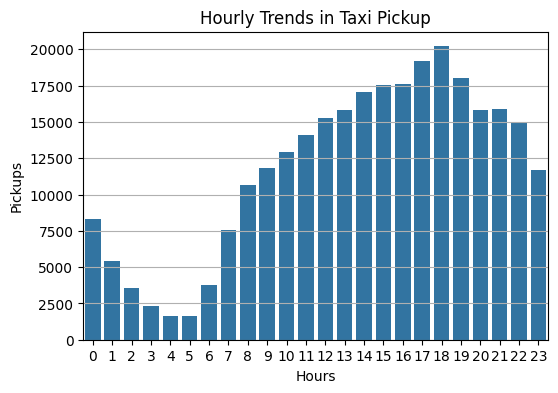

In [203]:
# Find and show the hourly trends in taxi pickups
result=df.groupby('tpep_pickup_hour').size();
plt.figure(figsize=(6, 4))
plt.title('Hourly Trends in Taxi Pickup')
plt.xlabel('Hours')
plt.ylabel('Pickups')
plt.grid(True)
sns.barplot(x = result.index, y = result.values);


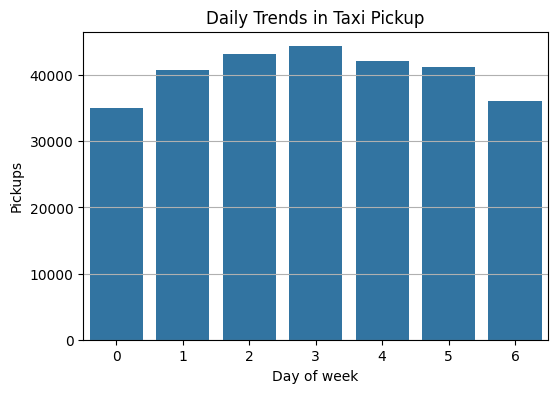

In [204]:
# Find and show the daily trends in taxi pickups (days of the week)
#Added a new column
df['pickup_dayOfWeek']=df['tpep_pickup_datetime'].dt.weekday;
resultByWeek =df.groupby('pickup_dayOfWeek').size()
plt.figure(figsize=(6, 4))
plt.title('Daily Trends in Taxi Pickup')
plt.xlabel('Day of week')
plt.ylabel('Pickups')
plt.grid(True)
sns.barplot(x = resultByWeek.index, y = resultByWeek.values);

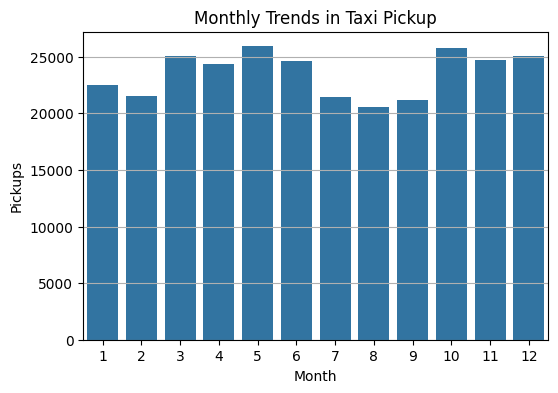

In [205]:
# Show the monthly trends in pickups

resultByMonth =df.groupby('tpep_pickup_month').size()
plt.figure(figsize=(6, 4))
plt.title('Monthly Trends in Taxi Pickup')
plt.xlabel('Month')
plt.ylabel('Pickups')
plt.grid(True)
sns.barplot(x = resultByMonth.index, y = resultByMonth.values);

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [206]:
# Analyse the above parameters
df[['fare_amount','tip_amount','total_amount','trip_distance']].describe()


fare_amount     tip_amount   total_amount  trip_distance
count  282861.000000  282861.000000  282861.000000  282861.000000
mean       19.761996       3.564281      28.859347       3.429233
std        18.093928       4.049884      22.693830       4.513070
min         0.000000       0.000000       0.000000       0.000000
25%         9.300000       1.000000      15.960000       1.050000
50%        13.500000       2.860000      21.000000       1.800000
75%        21.900000       4.450000      30.800000       3.400000
max       637.900000     202.000000     656.150000     204.100000

In [207]:
print("Yes we can see data with zero value, although we don't see null value")

Yes we can see data with zero value, although we don't see null value


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [208]:
# Create a df with non zero entries for the selected parameters.
#Created new DF with non zero for monetary calc
dfMonetary = df[(df['fare_amount'] > 0) & (df['tip_amount'] > 0) & (df['total_amount'] > 0) & 
~((df['trip_distance'] == 0) & (df['PULocationID'] != df['DOLocationID']) )]
dfMonetary.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-07-11 21:46:13   2023-07-11 21:51:39              1.0   
1         1  2023-01-10 14:25:03   2023-01-10 14:29:14              1.0   
2         2  2023-02-04 15:03:50   2023-02-04 15:47:48              1.0   
3         1  2023-03-28 10:49:36   2023-03-28 10:57:44              0.0   
4         2  2023-09-05 17:03:28   2023-09-05 17:12:44              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.90         1.0                  N           151            41   
1           0.70         1.0                  N           262           236   
2          21.09         2.0                  N           132           151   
3           1.00         1.0                  N           239           142   
4           1.74         1.0                  N           142           237   

   payment_type  ...  total_amount  congestion_surcharge  airport_fee  \
0             1  ...         10.80                   0.0         0.00   
1             1  ...         12.50                   2.5         0.00   
2             1  ...         89.30                   0.0         1.25   
3             1  ...         16.30                   2.5         0.00   
4             1  ...         21.48                   2.5         0.00   

   tpep_pickup_date  tpep_pickup_hour  tpep_pickup_month  tpep_pickup_year  \
0        2023-07-11                21                  7              2023   
1        2023-01-10                14                  1              2023   
2        2023-02-04                15                  2              2023   
3        2023-03-28                10                  3              2023   
4        2023-09-05                17                  9              2023   

   ratecode_name  paymentType_desc pickup_dayOfWeek  
0  Standard rate       Credit card                1  
1  Standard rate       Credit card                1  
2            JFK       Credit card                5  
3  Standard rate       Credit card                1  
4  Standard rate       Credit card                1  

[5 rows x 26 columns]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

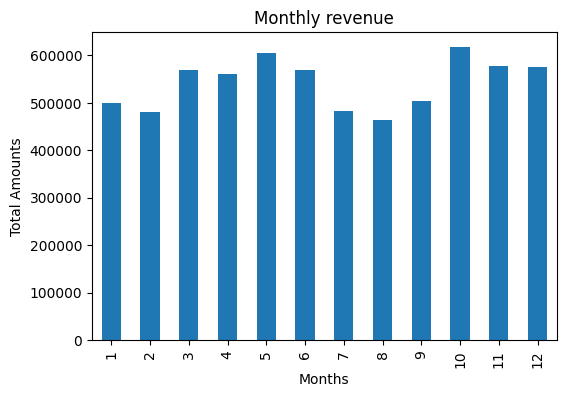

In [209]:
# Group data by month and analyse monthly revenue

plt.figure(figsize=(6, 4))
dfMonetary.groupby('tpep_pickup_month')['total_amount'].sum().plot.bar();
plt.title('Monthly revenue')
plt.xlabel('Months')
plt.ylabel('Total Amounts')
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

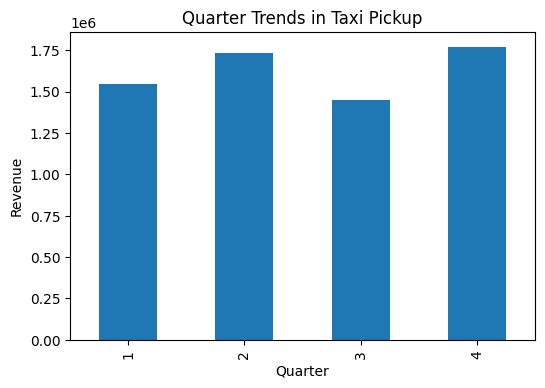

In [210]:
# Calculate proportion of each quarter
dfMonetary['Quarter'] = pd.cut(df['tpep_pickup_month'], [0,3,6,9,12], labels = [1,2,3,4])
plt.figure(figsize=(6, 4))
dfMonetary.groupby('Quarter')['total_amount'].sum().plot.bar();
plt.title('Quarter Trends in Taxi Pickup')
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

<Figure size 600x400 with 0 Axes>

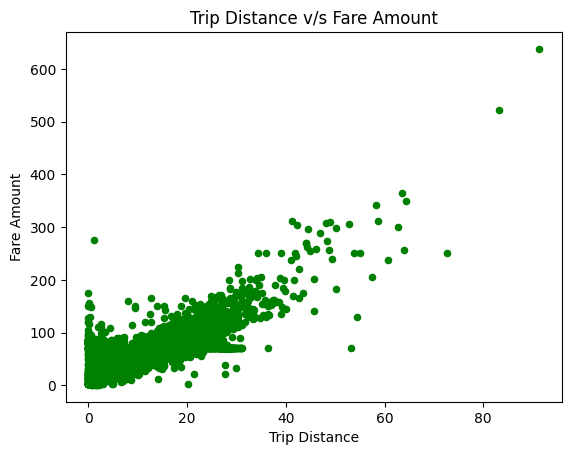

In [211]:
# Show how trip fare is affected by distance

dfMonetary =dfMonetary[dfMonetary['trip_distance'] != 0]
plt.figure(figsize=(6, 4))
corelTD_VS_FA =dfMonetary.plot(kind='scatter', x='trip_distance', y='fare_amount', color='green', title='Trip Distance v/s Fare Amount')
corelTD_VS_FA.set_xlabel("Trip Distance")
corelTD_VS_FA.set_ylabel("Fare Amount")
plt.show()

In [212]:
correlation_value = dfMonetary['trip_distance'].corr(dfMonetary['fare_amount'])
print("Correlation between trip_distance and fare_amount ", correlation_value.round(2))

Correlation between trip_distance and fare_amount  0.95


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [213]:
# Show relationship between fare and trip duration
#Added ne column
dfMonetary['trip_duration'] = (dfMonetary['tpep_dropoff_datetime'] - dfMonetary['tpep_pickup_datetime']).dt.total_seconds()/60
correlation_value = dfMonetary['trip_duration'].corr(dfMonetary['fare_amount'])
print("Correlation between trip_duration and fare_amount", correlation_value.round(2))


Correlation between trip_duration and fare_amount 0.36


<Figure size 600x400 with 0 Axes>

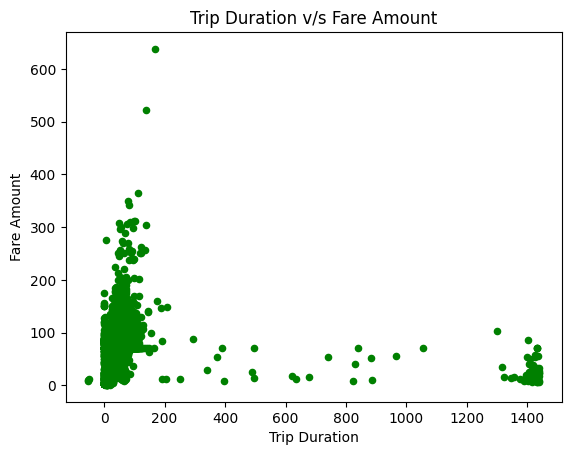

In [214]:
plt.figure(figsize=(6, 4))
FA_VS_TRIP =dfMonetary.plot(kind='scatter', x='trip_duration', y='fare_amount', color='green', title='Trip Duration v/s Fare Amount')
FA_VS_TRIP.set_xlabel("Trip Duration")
FA_VS_TRIP.set_ylabel("Fare Amount")
plt.show()

In [215]:
# Show relationship between fare and number of passengers
correlation_value = df['fare_amount'].corr(df['passenger_count'])
print("Correlation between fare_amount and passenger_count: ", correlation_value.round())


Correlation between fare_amount and passenger_count:  0.0


<Figure size 600x400 with 0 Axes>

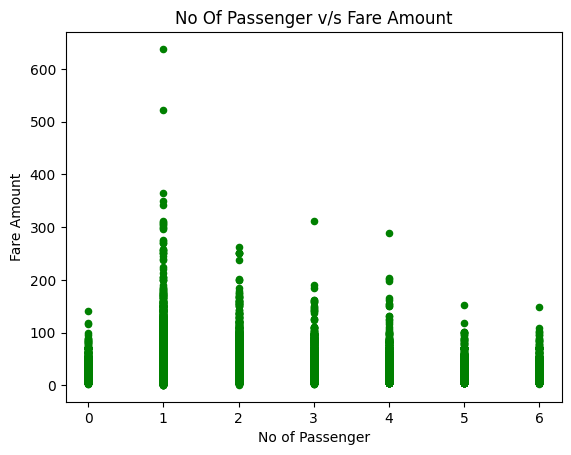

In [216]:
plt.figure(figsize=(6, 4))
fare_vs_passengerCount =dfMonetary.plot(kind='scatter', x='passenger_count', y='fare_amount', color='green', title='No Of Passenger v/s Fare Amount')
fare_vs_passengerCount.set_xlabel("No of Passenger")
fare_vs_passengerCount.set_ylabel("Fare Amount")
plt.show()

In [217]:
# Show relationship between tip and trip distance
correlation_value = df['tip_amount'].corr(df['trip_distance'])
print("Correlation between tip_amount and trip_distance: ", correlation_value.round())


Correlation between tip_amount and trip_distance:  1.0


<Figure size 600x400 with 0 Axes>

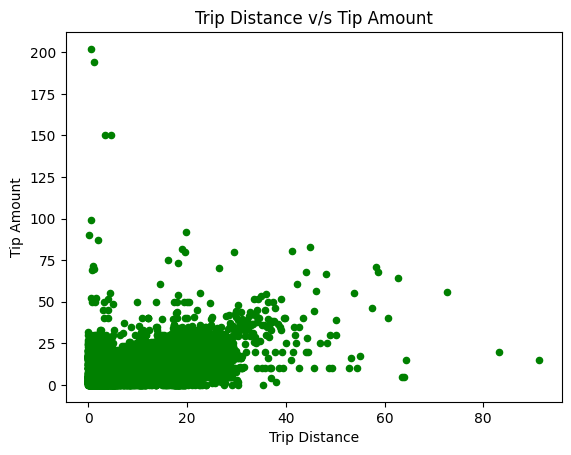

In [218]:
plt.figure(figsize=(6, 4))
Tip_vs_TripDuration =dfMonetary.plot(kind='scatter', x='trip_distance', y='tip_amount', color='green', title='Trip Distance v/s Tip Amount')
Tip_vs_TripDuration.set_xlabel("Trip Distance")
Tip_vs_TripDuration.set_ylabel("Tip Amount")
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

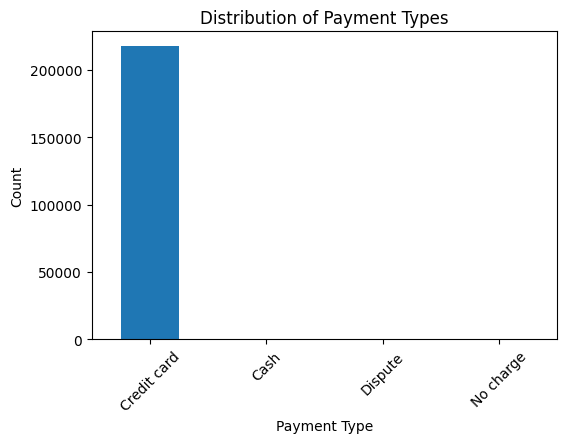

In [219]:
# Analyse the distribution of different payment types (payment_type).

payment_mapping = {
    1 : 'Credit card',
    2 : 'Cash',
    3 : 'No charge',
    4 : 'Dispute'
}
#Added new column
dfMonetary['payment_type_desc'] = df['payment_type'].map(payment_mapping)
plt.figure(figsize=(6, 4))
dfMonetary['payment_type_desc'].value_counts().plot(kind='bar')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [220]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [221]:
import geopandas as gpd


# Read the shapefile using geopandas
zones =gpd.read_file(r'H:\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

<Figure size 1000x700 with 0 Axes>

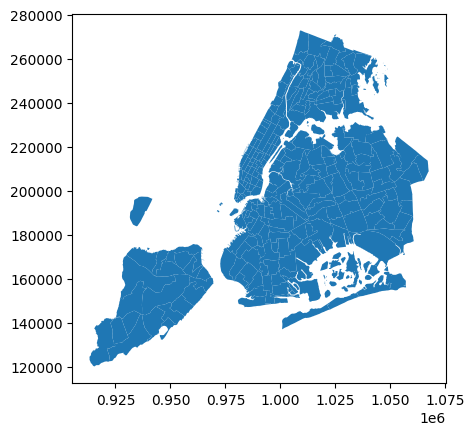

In [222]:
print(zones.info())
plt.figure(figsize=(10, 7))
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [223]:
# Merge zones and trip records using locationID and PULocationID
mergedDF=pd.merge(df,zones,left_on='PULocationID',right_on='LocationID',how='left')
mergedDF.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-07-11 21:46:13   2023-07-11 21:51:39              1.0   
1         1  2023-01-10 14:25:03   2023-01-10 14:29:14              1.0   
2         2  2023-02-04 15:03:50   2023-02-04 15:47:48              1.0   
3         1  2023-03-28 10:49:36   2023-03-28 10:57:44              0.0   
4         2  2023-09-05 17:03:28   2023-09-05 17:12:44              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.90         1.0                  N           151            41   
1           0.70         1.0                  N           262           236   
2          21.09         2.0                  N           132           151   
3           1.00         1.0                  N           239           142   
4           1.74         1.0                  N           142           237   

   payment_type  ...  ratecode_name  paymentType_desc  pickup_dayOfWeek  \
0             1  ...  Standard rate       Credit card                 1   
1             1  ...  Standard rate       Credit card                 1   
2             1  ...            JFK       Credit card                 5   
3             1  ...  Standard rate       Credit card                 1   
4             1  ...  Standard rate       Credit card                 1   

   OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
0     151.0    0.054890    0.000129       Manhattan Valley       151.0   
1     262.0    0.049064    0.000122         Yorkville East       262.0   
2     132.0    0.245479    0.002038            JFK Airport       132.0   
3     239.0    0.063626    0.000205  Upper West Side South       239.0   
4     142.0    0.038176    0.000076    Lincoln Square East       142.0   

     borough                                           geometry  
0  Manhattan  POLYGON ((994298.215 228195.015, 994169.55 227...  
1  Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....  
2     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
3  Manhattan  POLYGON ((991168.979 226252.992, 991955.565 22...  
4  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...  

[5 rows x 33 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [224]:
# Group data by location and calculate the number of trips

noOfTripByLoc =mergedDF.groupby('LocationID').size().sort_index(ascending=True)
print(noOfTripByLoc)

LocationID
1.0        30
2.0         1
3.0         3
4.0       340
6.0         6
         ... 
259.0       2
260.0      48
261.0    1470
262.0    3789
263.0    5420
Length: 233, dtype: int64


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [225]:
# Merge trip counts back to the zones GeoDataFrame
zones['NoOfTrips'] = zones['LocationID'].map(noOfTripByLoc)
zones.head()



OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  NoOfTrips  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...       30.0  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...        1.0  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...        3.0  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...      340.0  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...        NaN

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

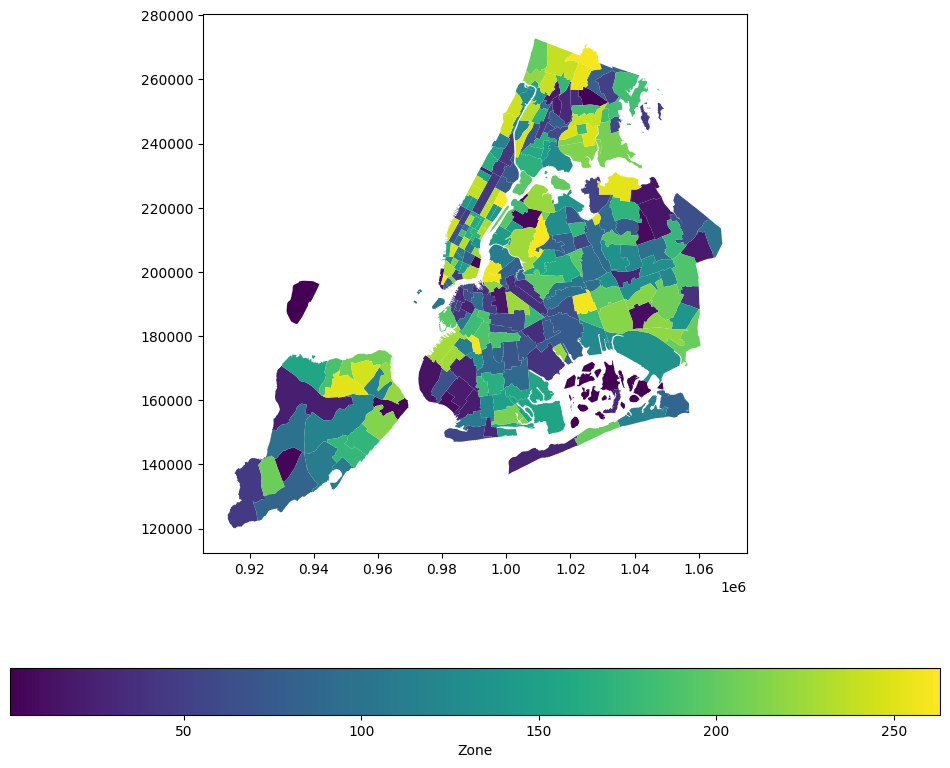

In [226]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column = 'LocationID',
ax = ax,
legend = True,
legend_kwds = {'label': "Zone", 'orientation': "horizontal"})
plt.show()

In [227]:
# can you try displaying the zones DF sorted by the number of trips?
zones.sort_values('NoOfTrips')


OBJECTID  Shape_Leng  Shape_Area                       zone  LocationID  \
57         58    0.059855    0.000205               Country Club          58   
85         86    0.134245    0.000623               Far Rockaway          86   
152       153    0.024737    0.000032                Marble Hill         153   
204       205    0.141953    0.000766               Saint Albans         205   
30         31    0.096425    0.000334                 Bronx Park          31   
..        ...         ...         ...                        ...         ...   
205       206    0.212757    0.000944  Saint George/New Brighton         206   
211       212    0.067129    0.000161         Soundview/Bruckner         212   
244       245    0.095983    0.000466              West Brighton         245   
250       251    0.137711    0.000626                Westerleigh         251   
252       253    0.036051    0.000078              Willets Point         253   

           borough                                           geometry  \
57           Bronx  POLYGON ((1035263.069 248349.465, 1035243.096 ...   
85          Queens  POLYGON ((1049025.346 163141.969, 1049041.462 ...   
152      Manhattan  POLYGON ((1010061.703 258338.334, 1009990.141 ...   
204         Queens  POLYGON ((1049028.76 195325.647, 1049096.735 1...   
30           Bronx  POLYGON ((1019950.154 251628.997, 1019950.288 ...   
..             ...                                                ...   
205  Staten Island  POLYGON ((961436.305 175473.03, 961460.942 175...   
211          Bronx  POLYGON ((1016294.401 239138.171, 1016244.934 ...   
244  Staten Island  POLYGON ((957085.564 172591.26, 957142.385 172...   
250  Staten Island  POLYGON ((947868.004 169247.734, 948000.981 16...   
252         Queens  POLYGON ((1028825.348 218121.42, 1029152.461 2...   

     NoOfTrips  
57         1.0  
85         1.0  
152        1.0  
204        1.0  
30         1.0  
..         ...  
205        NaN  
211        NaN  
244        NaN  
250        NaN  
252        NaN  

[263 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [228]:
# Find routes which have the slowest speeds at different times of the day
timeDiff = (mergedDF['tpep_dropoff_datetime'] - mergedDF['tpep_pickup_datetime']).dt.total_seconds() / 60
#Added new column
mergedDF['trip_duration'] = round(timeDiff,2)
#droffinf of row where start time is greater than drop time
mergedDF = mergedDF[mergedDF['tpep_dropoff_datetime'] >= mergedDF['tpep_pickup_datetime']]
mergedDF =mergedDF[mergedDF['trip_duration'] > 0]

#Added new column
mergedDF['trip_speed'] = (mergedDF['trip_distance'] / (mergedDF['trip_duration']/60)).round(2)
mergedDF =mergedDF[mergedDF['trip_speed'] < 200]

slowest_routes = mergedDF.loc[mergedDF.groupby('tpep_pickup_hour')['trip_speed'].idxmin()]
slowest_routes[['tpep_pickup_hour', 'trip_distance', 'trip_duration', 'trip_speed', 'tpep_pickup_datetime']]


tpep_pickup_hour  trip_distance  trip_duration  trip_speed  \
1976                  0            0.0          15.78         0.0   
473                   1            0.0          20.08         0.0   
4443                  2            0.0          12.43         0.0   
2756                  3            0.0          16.13         0.0   
70                    4            0.0          11.53         0.0   
16059                 5            0.0           0.20         0.0   
2340                  6            0.0          16.00         0.0   
4445                  7            0.0          11.10         0.0   
445                   8            0.0           0.07         0.0   
349                   9            0.0           0.55         0.0   
214                  10            0.0          15.22         0.0   
585                  11            0.0           9.87         0.0   
485                  12            0.0           0.08         0.0   
907                  13            0.0           1.00         0.0   
1995                 14            0.0           1.02         0.0   
489                  15            0.0           1.12         0.0   
1198                 16            0.0          28.97         0.0   
644                  17            0.0          11.08         0.0   
311                  18            0.0          22.15         0.0   
668                  19            0.0          10.72         0.0   
246                  20            0.0           0.25         0.0   
2291                 21            0.0           0.28         0.0   
348                  22            0.0          25.98         0.0   
107                  23            0.0          36.65         0.0   

      tpep_pickup_datetime  
1976   2023-08-05 00:33:29  
473    2023-06-04 01:29:44  
4443   2023-11-04 02:34:51  
2756   2023-10-01 03:14:42  
70     2023-11-05 04:21:03  
16059  2023-10-01 05:03:54  
2340   2023-09-08 06:33:38  
4445   2023-10-27 07:43:59  
445    2023-06-29 08:16:35  
349    2023-03-30 09:54:59  
214    2023-01-03 10:10:33  
585    2023-06-26 11:04:53  
485    2023-07-05 12:19:06  
907    2023-09-10 13:20:41  
1995   2023-04-12 14:55:58  
489    2023-08-22 15:18:48  
1198   2023-09-07 16:49:37  
644    2023-09-29 17:16:25  
311    2023-09-29 18:45:33  
668    2023-08-21 19:40:36  
246    2023-07-16 20:18:56  
2291   2023-03-30 21:40:02  
348    2023-07-13 22:35:40  
107    2023-07-28 23:31:49

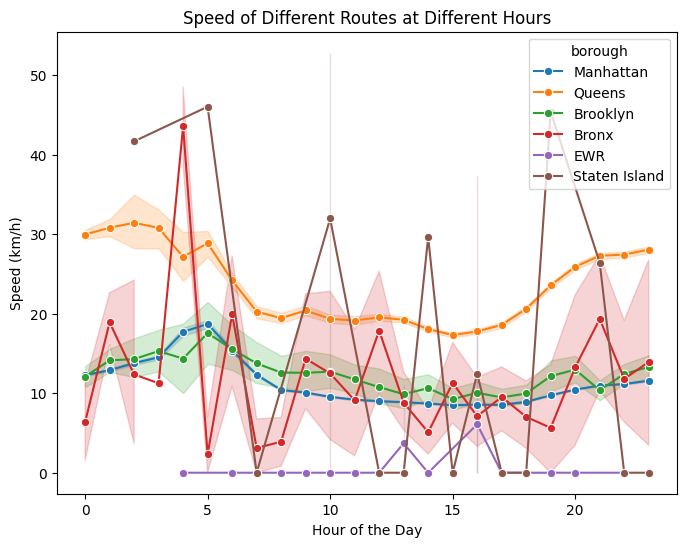

In [229]:

plt.figure(figsize=(8, 6))
sns.lineplot(x='tpep_pickup_hour', y='trip_speed', hue='borough', data=mergedDF, marker='o')

# Adding title and labels
plt.title('Speed of Different Routes at Different Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Speed (km/h)')

# Show plot
plt.show()

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

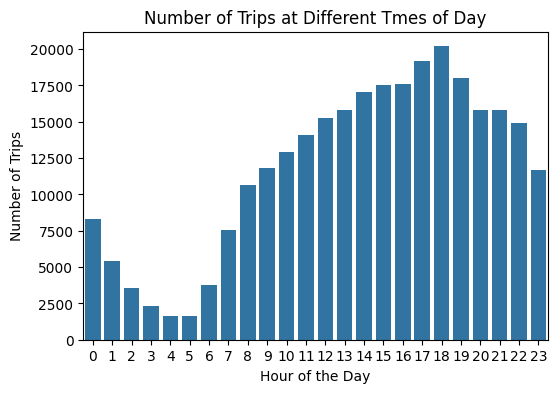

The busiest hour is 18 with 20191 trips.


In [230]:
# Visualise the number of trips per hour and find the busiest hour
plt.figure(figsize=(6, 4))
trips_per_hour = mergedDF.groupby('tpep_pickup_hour').size().reset_index(name='trip_count')
sns.barplot(x='tpep_pickup_hour', y='trip_count', data=trips_per_hour)

plt.title('Number of Trips at Different Tmes of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

busiest_hour = trips_per_hour.loc[trips_per_hour['trip_count'].idxmax()]

print(f"The busiest hour is {busiest_hour['tpep_pickup_hour']} with {busiest_hour['trip_count']} trips.")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [231]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =19.5



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

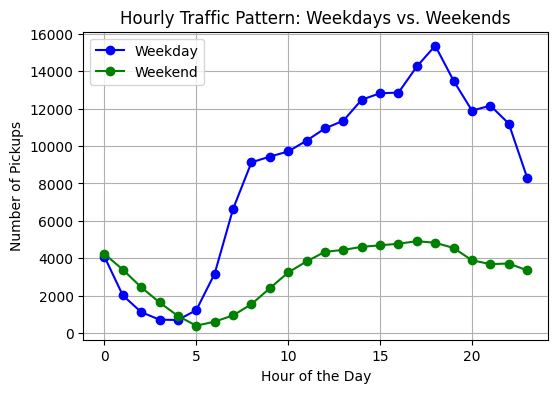

In [232]:
# Compare traffic trends for the week days and weekends
#Added new column
mergedDF['day_category'] = mergedDF['tpep_pickup_datetime'].dt.day_name().apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekdays')
weekdayDF=mergedDF[mergedDF['day_category'] == 'Weekdays']
WeekendDF=mergedDF[mergedDF['day_category'] == 'Weekend']

weekday_hourly = weekdayDF.groupby('tpep_pickup_hour').size()
weekend_hourly = WeekendDF.groupby('tpep_pickup_hour').size()

plt.figure(figsize=(6, 4))
plt.plot(weekday_hourly.index, weekday_hourly.values, label='Weekday', color='blue', marker='o')
plt.plot(weekend_hourly.index, weekend_hourly.values, label='Weekend', color='green', marker='o')

plt.title('Hourly Traffic Pattern: Weekdays vs. Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')

plt.legend()  
plt.grid(True)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [233]:
# Find top 10 pickup and dropoff zones
#Added new column
mergedDF['tpep_dropoff_hour'] = mergedDF['tpep_dropoff_datetime'].dt.hour
mergedDF['tpep_pickup_day'] = mergedDF['tpep_dropoff_datetime'].dt.day

pickup_hourly = mergedDF.groupby(['PULocationID', 'tpep_pickup_hour']).size().reset_index(name='pickupCount')
dropoff_hourly = mergedDF.groupby(['DOLocationID', 'tpep_dropoff_hour']).size().reset_index(name='dropoffCount')

top_pickup_zones = pickup_hourly.groupby('PULocationID')['pickupCount'].sum().nlargest(10).index

top_dropoff_zones = dropoff_hourly.groupby('DOLocationID')['dropoffCount'].sum().nlargest(10).index

mapping = dict(zones[['LocationID', 'zone']].values)
top_pickup_zones=top_pickup_zones.map(mapping)
top_dropoff_zones=top_dropoff_zones.map(mapping)

print('Top pickup zones are :- ',top_pickup_zones.values, '/\n')
print('Top dropof zones are :- ',top_dropoff_zones.values)

Top pickup zones are :-  ['JFK Airport' 'Upper East Side South' 'Midtown Center'
 'Upper East Side North' 'Midtown East' 'LaGuardia Airport'
 'Penn Station/Madison Sq West' 'Lincoln Square East'
 'Times Sq/Theatre District' 'Murray Hill'] /

Top dropof zones are :-  ['Upper East Side North' 'Upper East Side South' 'Midtown Center'
 'Times Sq/Theatre District' 'Murray Hill' 'Midtown East'
 'Lincoln Square East' 'Upper West Side South' 'Lenox Hill West'
 'East Chelsea']


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [234]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
zone_pickups =pickup_hourly.groupby('PULocationID')['pickupCount'].sum()
total_pickups = zone_pickups.sum()
zone_pickups_ratio = zone_pickups / total_pickups
print('-------------------Pickup Ratio -----------------------')
print(zone_pickups_ratio.nlargest(10))

zone_dropoff =dropoff_hourly.groupby('DOLocationID')['dropoffCount'].sum()
total_dropoff = zone_dropoff.sum()
zone_dropoff_ratio = zone_dropoff / total_dropoff
print('-------------------Dropoff Ratio -----------------------')
print(zone_dropoff_ratio.nlargest(10))


-------------------Pickup Ratio -----------------------
PULocationID
132    0.050802
237    0.046773
161    0.046002
236    0.042860
162    0.035042
138    0.034440
186    0.033892
142    0.033393
230    0.032859
170    0.029438
Name: pickupCount, dtype: float64
-------------------Dropoff Ratio -----------------------
DOLocationID
236    0.044250
237    0.042092
161    0.039531
230    0.030326
170    0.029466
162    0.028454
142    0.028072
239    0.028030
141    0.026399
68     0.025083
Name: dropoffCount, dtype: float64


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [235]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours_df = mergedDF[(mergedDF['tpep_pickup_hour'] >= 23) | (mergedDF['tpep_pickup_hour'] <= 5)]

night_pickup_hourly = night_hours_df.groupby(['PULocationID', 'tpep_pickup_hour']).size().reset_index(name='pickupCount')
night_dropoff_hourly = night_hours_df.groupby(['DOLocationID', 'tpep_dropoff_hour']).size().reset_index(name='dropoffCount')

top_night_pickup_zones = night_pickup_hourly.groupby('PULocationID')['pickupCount'].sum().nlargest(10).index

top_night_dropoff_zones = night_dropoff_hourly.groupby('DOLocationID')['dropoffCount'].sum().nlargest(10).index

top_night_pickup_zones=top_night_pickup_zones.map(mapping)
top_night_dropoff_zones=top_night_dropoff_zones.map(mapping)

print('Top pickup zones at night are :- ',top_night_pickup_zones.values, '/\n')
print('Top dropof zones at night are :- ',top_night_dropoff_zones.values)


Top pickup zones at night are :-  ['East Village' 'JFK Airport' 'West Village' 'Clinton East'
 'Lower East Side' 'Greenwich Village South' 'Times Sq/Theatre District'
 'Penn Station/Madison Sq West' 'East Chelsea' 'Midtown South'] /

Top dropof zones at night are :-  ['East Village' 'Clinton East' 'Murray Hill' 'Gramercy' 'East Chelsea'
 'Lenox Hill West' 'West Village' 'Times Sq/Theatre District'
 'Yorkville West' 'Upper West Side South']


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [236]:
# Filter for night hours (11 PM to 5 AM)

day_hours__df = mergedDF[(mergedDF['tpep_pickup_hour'] >5 ) & (mergedDF['tpep_pickup_hour'] < 23)]

daytime_revenue = day_hours__df['total_amount'].sum()
nighttime_revenue = night_hours_df['total_amount'].sum()

total_revenue = mergedDF['total_amount'].sum()

daytime_revenue_share = daytime_revenue / total_revenue
nighttime_revenue_share = nighttime_revenue / total_revenue

print(f"Daytime Revenue Share: {daytime_revenue_share:.2f}")
print(f"Nighttime Revenue Share: {nighttime_revenue_share:.2f}")

Daytime Revenue Share: 0.87
Nighttime Revenue Share: 0.13


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

passenger_count
1.0    10.68
2.0     6.67
3.0     3.82
4.0     4.49
5.0     1.85
6.0     1.31
Name: fare_per_mile_per_passenger, dtype: float64


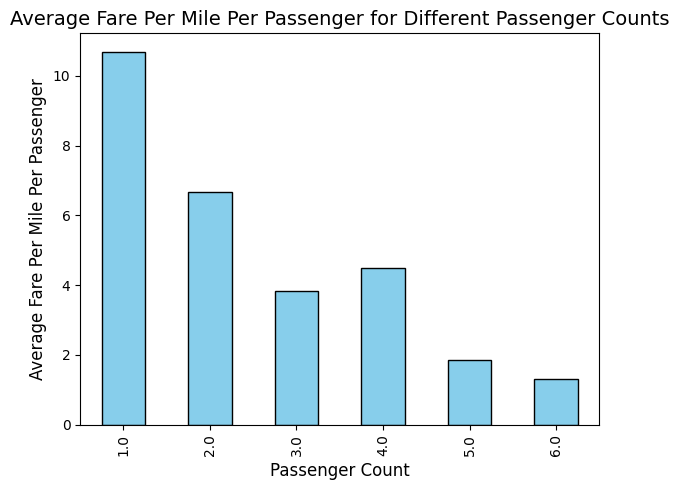

In [237]:
# Analyse the fare per mile per passenger for different passenger counts

fareAnalysisDF=mergedDF[(mergedDF['trip_distance'] > 0 ) & (mergedDF['passenger_count'] > 0 )]
#Added new column
fareAnalysisDF['fare_per_mile_per_passenger'] = fareAnalysisDF['fare_amount'] / (fareAnalysisDF['trip_distance'] * fareAnalysisDF['passenger_count'])

average_fare_per_mile_per_passenger = fareAnalysisDF.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().round(2)

print(average_fare_per_mile_per_passenger)

plt.figure(figsize=(6, 5))
average_fare_per_mile_per_passenger.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Fare Per Mile Per Passenger for Different Passenger Counts', fontsize=14)
plt.xlabel('Passenger Count', fontsize=12)
plt.ylabel('Average Fare Per Mile Per Passenger', fontsize=12)
plt.tight_layout()
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

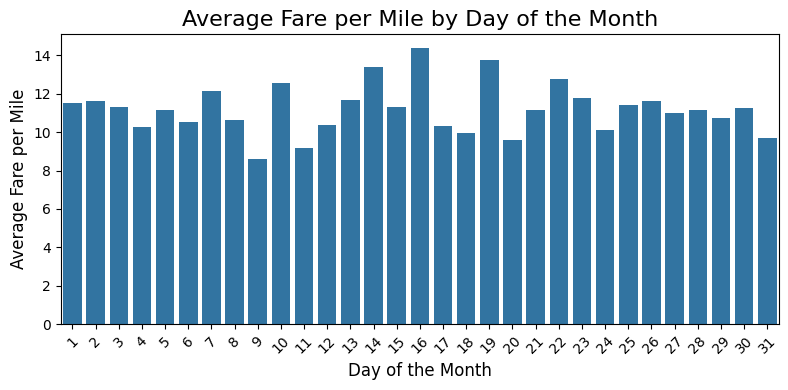

In [238]:
# Compare the average fare per mile for different days and for different times of the day
fareAnalysisDF['fare_per_mile'] =fareAnalysisDF['fare_amount'] / fareAnalysisDF['trip_distance'] 

avg_fare_per_day = fareAnalysisDF.groupby('tpep_pickup_day')['fare_per_mile'].mean().round(2).reset_index()

avg_fare_per_hour = fareAnalysisDF.groupby('tpep_pickup_hour')['fare_per_mile'].mean().round(2).reset_index()
avg_fare_per_hour

plt.figure(figsize=(8, 4))
sns.barplot(x='tpep_pickup_day', y='fare_per_mile', data=avg_fare_per_day)

plt.title('Average Fare per Mile by Day of the Month', fontsize=16)
plt.xlabel('Day of the Month', fontsize=12)
plt.ylabel('Average Fare per Mile', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


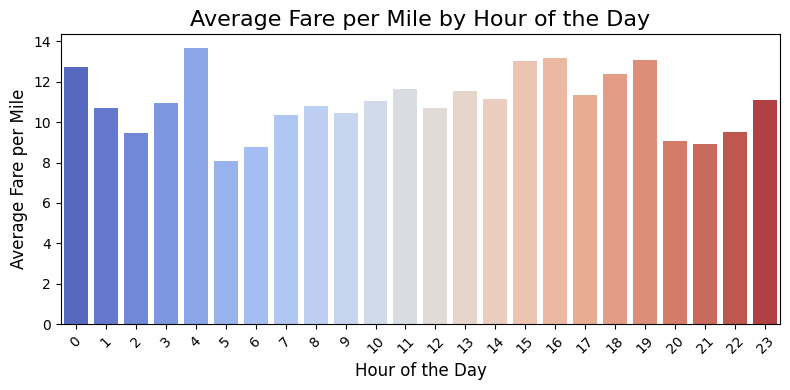

In [239]:
plt.figure(figsize=(8, 4))
sns.barplot(x='tpep_pickup_hour', y='fare_per_mile', data=avg_fare_per_hour,palette ='coolwarm')

plt.title('Average Fare per Mile by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Fare per Mile', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

    VendorID  tpep_pickup_hour  fare_per_mile
0          1                 0           6.62
1          1                 1           6.78
2          1                 2           7.30
3          1                 3           6.52
4          1                 4           6.17
..       ...               ...            ...
59         6                17           4.68
60         6                18           3.85
61         6                19           7.63
62         6                20           3.79
63         6                22           3.47

[64 rows x 3 columns]


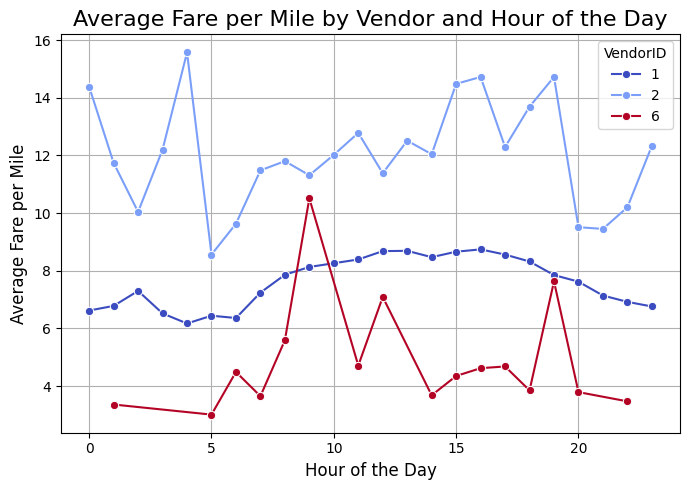

In [240]:
# Compare fare per mile for different vendors

avg_fare_per_vendor_hour = fareAnalysisDF.groupby(['VendorID', 'tpep_pickup_hour'])['fare_per_mile'].mean().round(2).reset_index()
print(avg_fare_per_vendor_hour)
plt.figure(figsize=(7, 5))
sns.lineplot(x='tpep_pickup_hour', y='fare_per_mile', hue='VendorID', data=avg_fare_per_vendor_hour, marker='o', palette='coolwarm')

plt.title('Average Fare per Mile by Vendor and Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Fare per Mile', fontsize=12)

plt.tight_layout()
plt.grid(True)
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


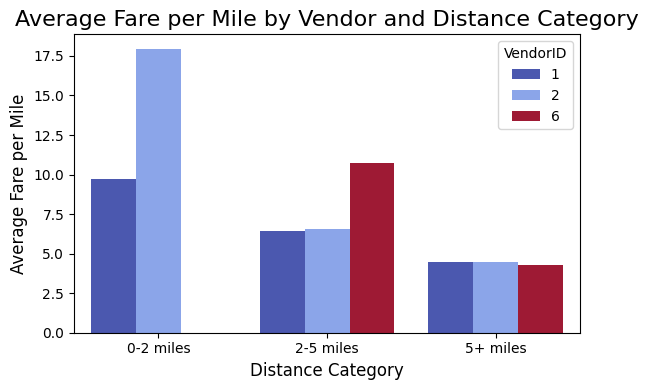

In [241]:
# Defining distance tiers

bins = [0, 2, 5, float('inf')] 
labels = ['0-2 miles', '2-5 miles', '5+ miles']
#Added new column
fareAnalysisDF['distance_category'] = pd.cut(fareAnalysisDF['trip_distance'], bins=bins, labels=labels, right=False)
avg_fare_per_vendor_distance = fareAnalysisDF.groupby(['VendorID', 'distance_category'])['fare_per_mile'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='distance_category', y='fare_per_mile', hue='VendorID', data=avg_fare_per_vendor_distance, palette='coolwarm')

plt.title('Average Fare per Mile by Vendor and Distance Category', fontsize=16)
plt.xlabel('Distance Category', fontsize=12)
plt.ylabel('Average Fare per Mile', fontsize=12)

plt.tight_layout()
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

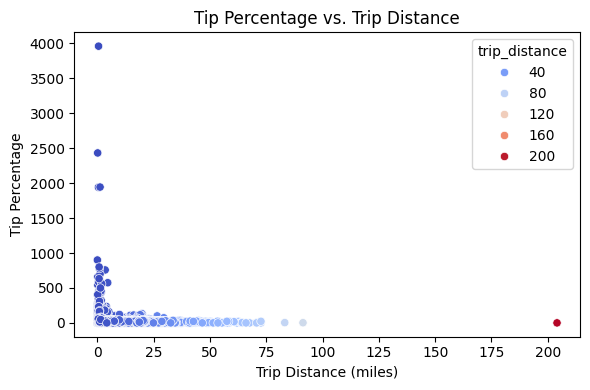

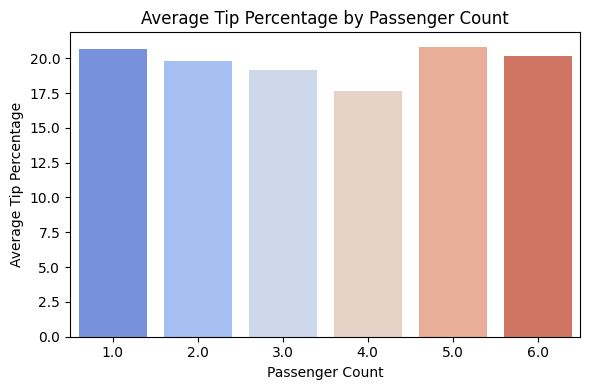

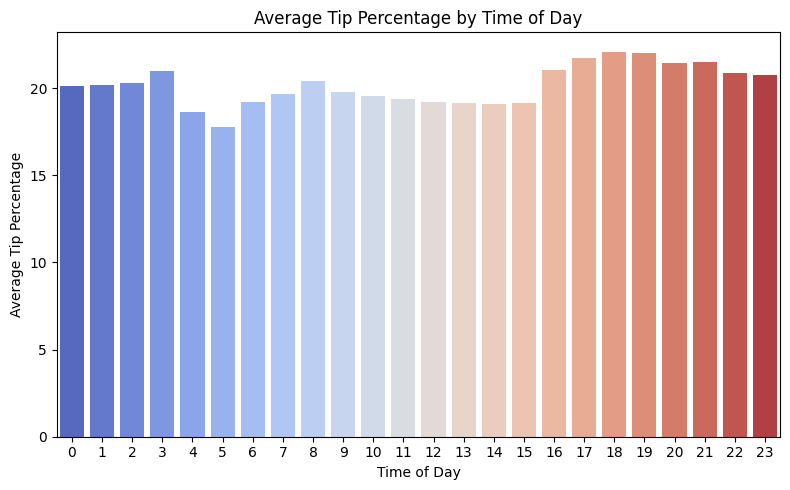

In [242]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
fareAnalysisDF['tip_percentage'] = (fareAnalysisDF['tip_amount'] / fareAnalysisDF['fare_amount']) * 100

avg_tip_by_distance = fareAnalysisDF.groupby('trip_distance')['tip_percentage'].mean().reset_index()

# Group by 'passenger_count' and calculate the average tip percentage
avg_tip_by_passenger_count = fareAnalysisDF.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# Group by 'time_of_day' (pickup time) and calculate the average tip percentage
avg_tip_by_time_of_day = fareAnalysisDF.groupby('tpep_pickup_hour')['tip_percentage'].mean().reset_index()

# Visualizing tip percentages by distance
plt.figure(figsize=(6, 4))
sns.scatterplot(x='trip_distance', y='tip_percentage', data=fareAnalysisDF, hue='trip_distance', palette='coolwarm')
plt.title('Tip Percentage vs. Trip Distance', fontsize=12)
plt.xlabel('Trip Distance (miles)', fontsize=10)
plt.ylabel('Tip Percentage', fontsize=10)
plt.tight_layout()
plt.show()

# Visualizing tip percentages by passenger count
plt.figure(figsize=(6, 4))
sns.barplot(x='passenger_count', y='tip_percentage', data=avg_tip_by_passenger_count, palette='coolwarm')
plt.title('Average Tip Percentage by Passenger Count', fontsize=12)
plt.xlabel('Passenger Count', fontsize=10)
plt.ylabel('Average Tip Percentage', fontsize=10)
plt.tight_layout()
plt.show()

# Visualizing tip percentages by time of day
plt.figure(figsize=(8, 5))
sns.barplot(x='tpep_pickup_hour', y='tip_percentage', data=avg_tip_by_time_of_day, palette='coolwarm')
plt.title('Average Tip Percentage by Time of Day', fontsize=12)
plt.xlabel('Time of Day', fontsize=10)
plt.ylabel('Average Tip Percentage', fontsize=10)
plt.tight_layout()
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [243]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

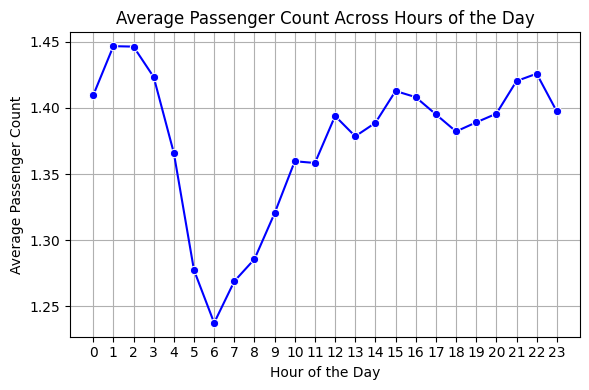

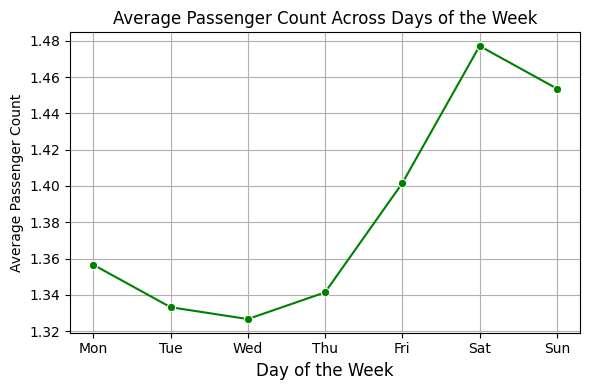

In [244]:
# See how passenger count varies across hours and days
avg_passenger_hour = fareAnalysisDF.groupby('tpep_pickup_hour')['passenger_count'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.lineplot(x='tpep_pickup_hour', y='passenger_count', data=avg_passenger_hour, marker='o', color='b')
plt.title('Average Passenger Count Across Hours of the Day', fontsize=12)
plt.xlabel('Hour of the Day', fontsize=10)
plt.ylabel('Average Passenger Count', fontsize=10)
plt.xticks(range(24))  # Ensure all hours are labeled
plt.tight_layout()
plt.grid(True)
plt.show()

avg_passenger_day = fareAnalysisDF.groupby('pickup_dayOfWeek')['passenger_count'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.lineplot(x='pickup_dayOfWeek', y='passenger_count', data=avg_passenger_day, marker='o', color='g')
plt.title('Average Passenger Count Across Days of the Week', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Passenger Count', fontsize=10)
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Label days of the week
plt.tight_layout()
plt.grid(True)
plt.show()




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [245]:
# How does passenger count vary across zones
zone_passenger_counts = df.groupby('PULocationID')['passenger_count'].mean().reset_index()

print(zone_passenger_counts)

     PULocationID  passenger_count
0               1         1.900000
1               2         1.000000
2               3         1.333333
3               4         1.276471
4               6         1.333333
..            ...              ...
230           261         1.506122
231           262         1.286883
232           263         1.320111
233           264         1.335086
234           265         1.331858

[235 rows x 2 columns]


In [246]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

mappingLocVsAvgPassenger = dict(zone_passenger_counts[['PULocationID', 'passenger_count']].values)
zones['AvgPassengerCount'] = zones['LocationID'].map(mappingLocVsAvgPassenger)

average_passenger_count_per_zone = zones.groupby('zone')['AvgPassengerCount'].sum().reset_index()

# Sorting by average passenger count for better visualization
average_passenger_count_per_zone_sorted = average_passenger_count_per_zone.sort_values(by='AvgPassengerCount', ascending=False)


print(average_passenger_count_per_zone_sorted)

                                  zone  AvgPassengerCount
179                         Pelham Bay           3.000000
54                        Country Club           3.000000
53                              Corona           2.727273
255                 Woodlawn/Wakefield           2.500000
19                    Bensonhurst West           2.000000
..                                 ...                ...
109                Grymes Hill/Clifton           0.000000
202          Saint George/New Brighton           0.000000
166                 Murray Hill-Queens           0.000000
167             New Dorp/Midland Beach           0.000000
80   Eltingville/Annadale/Prince's Bay           0.000000

[260 rows x 2 columns]


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [247]:
# How often is each surcharge applied?

surcharge_columns = ['congestion_surcharge', 'improvement_surcharge', 'airport_fee']
surcharge_frequencies = {col: df[col].mean().round(2) for col in surcharge_columns}
for surcharge, frequency in surcharge_frequencies.items():
    print(f"{surcharge} Frequency: {frequency * 100:.2f}%")

congestion_surcharge Frequency: 233.00%
improvement_surcharge Frequency: 100.00%
airport_fee Frequency: 14.00%


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

1.	Now that with have analysed historical data to identify busy and quiet periods in different zones.
2.	Increase the fleet size in high-demand zones during peak times
3.	Decrease the fleet size or rotate vehicles to low-demand zones during off-peak hours.
4.	Ensures that there are enough vehicles in high-demand zones while minimizing idle time in quiet zones.
5.	Some routes may become congested or experience long wait times during rush hour.
6.	Prioritize alternative routes or less congested areas to avoid heavy traffic during peak times
7.	Consider surge pricing during peak hours to manage high demand
8.	Use zone-level data to optimize the vehicle fleet and dispatch vehicles only when needed in that particular zone
9.  From the chart we can see during evening hour we have peak demand of taxi
10. Similarly in the mid of the week demand of taxi are more.
11. From the yearly chart we can observe there is a good demand of taxi during holiday season of November and December.
12. There is a positive corelation between trip distance v/s fare amount which is quite obvious case in general.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1.	Position taxis based on demand patterns, ensuring cabs are available when and where they're needed most. From our analysis we can see during evening we have a huge demand.
2.	Other thing to observe is the demand at various hour of the day between weekends and weekday. And we could see there is a steady increase in the taxi demand from 8 Am onwards till evening in weekdays where as on weekend we don’t see any linear surge.

3.	We also know the top pickup and drop-off zone where is a great demand between normal hour and night hour, so we can position ideal taxi from non-demand zones to these places.
4.	Special events such as New Year’s Eve, Christmas Eve, and national holidays cause significant spikes in demand.We can position cabs near hotel districts, transport hubs, shopping centers to capitalize demand.
5.	Position more vehicles in high-demand zones based on trip trends
6.	During low-demand times, consider relocating cabs from quieter areas to busier locations or adjust routes to avoid unnecessary travel.
7.  We can also run promotional drive during non rush hour to increase trip on non rush hours.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1.	From the Historical data we analysed now we know the hour ,events and locations that lead to high demand e.g rush hours, holidays, or events. Implement surge pricing during these peak times, where prices increase based on demand.
2.	Now we know the correlation between trip duration, distance, and fare. We can adjust price based on average trip times and distances for various routes. For longer trips, we can offer discounts or promotions to encourage more rides, while shorter trips could have slightly higher rates to ensure profitability.
3.	From the pickup and drop-off location data we know the high demand zones so we can implement zone-based pricing. It is easy to identify the area where taxi demand is either underpriced or over-priced and adjust your rates accordingly.
4.	After analysing hourly data we now know the rush hour throughout the day. So fares can be increased during rush hour or late-night hours when demand typically surges. This ensures that our pricing is competitive with alternative transport options
